#### <a id='top'></a>

# Homework 5: Distributions
***

**Name**: Jonathan Phouminh

***

This assignment is due on Canvas by **MIDNIGHT on Monday October 19**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available under the **Data** module on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Remember that there is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Kernel $\rightarrow$ Restart & Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 95 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) |

---

## Collaborators

Zachary Chomalla<br>
Bao Nguyen <br>
Josh Bui

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

***
<a/ id='p1'></a>
[Back to top](#top)

## (30 pts) Problem 1: Theory (Continuous Distributions)
***

Suppose you are modeling the probability of observing various levels of cuteness in hedgehogs you encounter.  Let $X$ be a random variable representing the observed cuteness, which is *obviously* nonnegative and has units of deci*awws*. You decide to use the following pdf for $X$:

$$
f(x) = \begin{cases}
         c \frac{1}{x^2} & =1 \leq x < \infty \\
         0                           & \text{otherwise}
       \end{cases}
$$
where $c$ is some normalizing constant.

**Part A**: Determine the value of $c$ such that $f(x)$ is a valid probability density function. Then, make a plot of the probability density function for hedgehog cuteness, $f(x)$. Be sure to label your axes!

To determine the value of C, we will integrate the pdf from 1 to infinity where we set that equal to 1 because the total area under the curve for a pdf is 1 if it is valid.

$$ \int_1^\infty C*\frac{1}{x^2}\,dx = 1$$


$C$ + $ \int_1^\infty \frac{1}{x^2}\,dx $ <br><br>

C + $(\lim_{x \to +\infty} \frac{-1}{x})(\frac{-1}{x})$  <br><br>

... do the difference of the integral of x=infinity and x=1 ... <br><br>

C(0 + 1) = 1 <br><br>

therefore C = 1

<function matplotlib.pyplot.show>

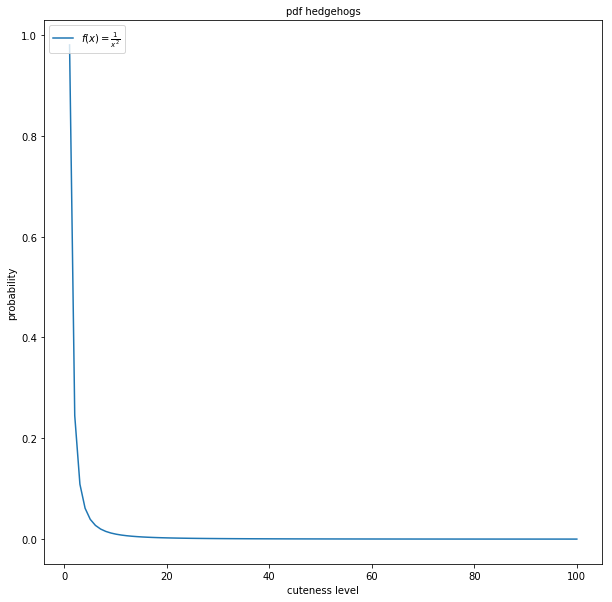

In [2]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title("pdf hedgehogs", fontsize= 10)
ax.set_ylabel("probability", fontsize= 10)
ax.set_xlabel("cuteness level", fontsize=10)


# the function
def f(x):
    with np.errstate(divide='ignore', invalid = 'ignore'):
        return 1/x**2

fx_name = r'$f(x) = \frac{1}{x^2}$'

x=np.linspace(0,100,100)
y=f(x)
plt.plot(x,y,label=fx_name)
plt.legend(loc='upper left')
plt.show

**Part B**: Compute *by hand* the cumulative density (cdf) function $F(x)$ for $X$.

We calculate the cdf by integrating the pdf from 1 to x

$ \int_1^x \frac{1}{x^2}\,dx $ <br><br>
$ \int_1^x -x^2\,dx $  integrate then plug in bounds <br><br>   
CDF = $-\frac{1}{x} + 1$ <br><br>

$$
f(x) = \begin{cases}
         -\frac{1}{x} + 1 & 1 \leq x < \infty \\
         0                           & \text{otherwise}
       \end{cases}
$$

**Part C:**  Use the cdf you derived in **Part B** to calculate the median ($\tilde{x}$) cuteness of all hedgehogs.

We solve for the median by finding the x value where we achieve the 50th percentile of total probability for our cdf

$-\frac{1}{x} + 1  = 1/2$   now we solve for x <br><br>

$\tilde{x} = 2$

**Part D**: It is a well-known fact that any hedgehog whose cuteness exceeds 2.5 deciawws is **totes adorbz**. Use the cdf you computed in **Part B** to find the probability that any arbitrary hedgehog that you observe is totes adorbz.

The way we can approach this problem by finding the probably of totes adorbz for x = 2.5 then subtract one from that value.

$f(2.5) = -\frac{1}{2.5} + 1$ <br><br>
$f(2.5) = .60$ <br><br>

therefore afte we do 1 - f(2.5) we get <br>

$f( x > 2.5) = .40$

**Part E:** You have been painstakingly collecting data on hedgehogs all over town, and the cuteness is damn near overwhelming. Suppose you sample 5 hedgehogs, and the cuteness of any given hedgehog is independent of the cuteness of all other hedgehogs. What is the probability that more than half of them are totes adorbz? Keep at least 5 decimal places in your answer.

We approach this problem by solving for the equation for a binomial problem.

In [3]:
import math
def calculateBinomial(probability, trials, successes):
    c = math.factorial(trials) /  (math.factorial(trials - successes) * math.factorial(successes))
    a = math.pow(probability, successes)
    b = math.pow(1-probability, trials - successes)
    return a * b * c

print(calculateBinomial(.4, 5, 3))

0.23040000000000005


***
<a/ id='p2'></a>
[Back to top](#top)

## (30 pts) Problem 2: Theory (Named Distributions)
***
Person $X$ is waiting at a bus stop where the bus arrives *exactly* every ten minutes. Person Y is at a different stop, waiting for a bus that arrives *on average* every 8 minutes. Neither person knows how long ago the last bus arrived, and the arrival time of one bus is not dependent on the other bus.


Answer the problems below assuming the wait time for person $Y$ follows an exponential distribution and the wait time for person $X$ follows a uniform distribution.

**Part A**: What are the values of the parameters of the uniform distribution for person X?

Uniform Distribution states:  $f(x) = \frac{1}{b-a}$ <br>
Where in this example $a = 0$ and $b = 10$

**Part B**: What are the values of the parameters of the exponential distribution for person Y ?


Exponential Distribution states: $f(x) = \lambda*e^{-\lambda * x}$
Where in this example $\lambda = 1/8$  , one stop for every eight minutes

**Part C**: Let $Z$ be defined as the total amount of time both people (combined) wait.  What are $E[Z]$ and $Var[Z]$?

**V[X]** <br><br>
$ \int_0^{10} (x-5)^2 * \frac{1}{10}\,dx $ <br><br>
$ Var[x] = 8.33 $

**E[Y]** <br> <br>

Variance for Exponential = $\frac{1}{\lambda^2}$

E[Z] = E[X] + E[Y] = **72.333**

**Part D**: What is the exact probability both people wait more than 4 minutes?


P(both wait 4 minutes) = P(x waits more than 4 minutes) * P(y waits more than minutes)
 
<br><br>
We know that person X has a uniform distributed wait time so P(x waits more than 4 minutes) = 6/10

<br><br>
To find P(y waits more than 4 minutes) we need to integrate the cdf from 0 to 4) then do subtract one <br>
$ \int_4^8 \lambda * e^{-\lambda * x}\,dx - 1 = .60654$

**P(both wait 4 minutes) = .6 * .60654 = .363924**

***
<a/ id='p3'></a>
[Back to top](#top)

## (35 pts) Problem 3: Simulation and Theory (Games)
***

The Riddler is a column on the website https://fivethirtyeight.com that posts logic, math, and probability puzzles each week.  Some of puzzles can be attacked by simulation and discrete probability: things that we have the tools to solve!

(https://fivethirtyeight.com/features/how-low-can-you-roll/)

You are given a fair, unweighted 10-sided die with sides labeled 0 to 9 and a sheet of paper to record your score. (If the very notion of a fair 10-sided die bothers you, and you need to know what sort of three-dimensional solid it is, then forget it — you have a random number generator that gives you an integer value from 0 to 9 with equal probability. Your loss — the die was a collector’s item.)

To start the game, you roll the die. Your current “score” is the number shown, divided by 10. For example, if you were to roll a 7, then your score would be 0.7. Then, you keep rolling the die over and over again. Each time you roll, if the digit shown by the die is less than or equal to the last digit of your score, then that roll becomes the new last digit of your score. Otherwise you just go ahead and roll again. The game ends when you roll a zero.

For example, suppose you roll the following: 6, 2, 5, 1, 8, 1, 0. After your first roll, your score would be 0.6, After the second, it’s 0.62. You ignore the third roll, since 5 is greater than the current last digit, 2. After the fourth roll, your score is 0.621. You ignore the fifth roll, since 8 is greater than the current last digit, 1. After the sixth roll, your score is 0.6211. And after the seventh roll, the game is over — 0.6211 is your final score.

What will be your average final score in this game?

**Part A**: Suppose our current value is $0.abcd$ for some 1-9 integers $a, b, c, d.$  What is the theoretical distribution of $e$, the next *term* in the final score's decimal representation?  Name the distribution and list all of its outcomes and their probabilities.  Note that "there are no additional terms" should have non-zero probability.

Theoretically we should see a distribution that is similar to an exponential curve.

**Part B**: What is the expected number of *rolls* until you're done?  What distribution is this?



We can construct a cdf of the probability of the rolls until we are done for n to 10000 , we could also do infinity but not going to, then we can use that cdf we constructed and cacluate its expected value for when the game should end

In [255]:
# calculate the geometric distribution
def calculateGeometric(trials, successprob):
    a = (1-successprob)**(trials - 1)
    b = successprob
    return a * b 


def getExpected():
    cdf = []
    for i in range(1,10000):
        cdf.append(calculateGeometric(i, 1/10))
        
    expectation = 0
    j = 1
    for trial in cdf:
        expectation = expectation + (j * trial)
        j = j + 1
    return expectation


print("Rolls until done expectation: ", getExpected())

Rolls until done expectation:  9.99999999999999


**Part C**: Simulate 10000 trials of this game, recording a score for each, then compute and print the average score over all of those trials. 

(Note: To check your result, you can find the exact *expected* solution in the following week's column: https://fivethirtyeight.com/features/can-you-decode-the-riddler-lottery/... but we want to simulate!)


In [232]:
def rollypolly2():
    count = 1
    gameSum = 0.0
    roll = np.random.randint(10)
    previousRoll = roll
    while(roll != 0):
        if roll <= previousRoll:
            gameSum = gameSum + (roll / (10**count))
            count = count + 1
            previousRoll = roll
        roll = np.random.randint(10)
    return gameSum

In [233]:
gameResults = []

for i in range(10000):
    value = rollypolly2()
    gameResults.append(value)

# getting the average
print(np.mean(gameResults))

0.471818702095


**Part D**: Make a histogram of all your scores from part C, and include a vertical line placed at the mean score from part C.

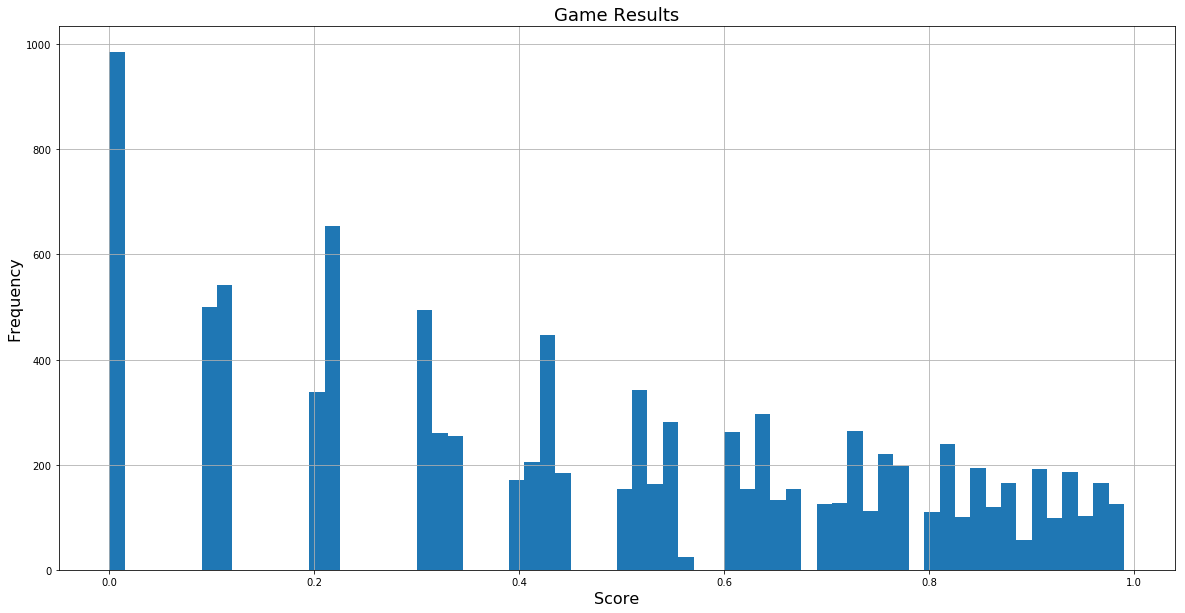

In [246]:
def plotHistogram(finishing_times):
    series = pd.Series(finishing_times)

    my_bins = np.arange(0,1,.015)
    fig, ax = plt.subplots(figsize=(20,10))

    plt.hist(series, bins = my_bins)
    ax.set_title("Game Results", fontsize = 18)
    ax.set_ylabel("Frequency", fontsize = 16)
    ax.set_xlabel("Score", fontsize = 16)
    ax.grid(alpha=1)
    
plotHistogram(gameResults)